In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('train-v3.csv')
df

id   price  sale_yr  sale_month  sale_day  bedrooms  bathrooms  \
0      5615100330  200000     2015           3        27         4       2.00   
1      8835900086  350000     2014           9         2         4       3.00   
2      9510900270  254000     2014          12        11         3       2.00   
3      2621600015  175000     2015           4        30         3       1.00   
4      8078350090  619000     2015           3        31         3       2.50   
...           ...     ...      ...         ...       ...       ...        ...   
12962  9253900354  580000     2014           7         1         3       2.50   
12963  9510300130  598000     2014           6        28         4       2.50   
12964  1105000373  252500     2015           5         6         2       1.50   
12965  3629990280  497000     2014           6        23         3       2.25   
12966  9521100586  479000     2014           5        24         3       1.00   

       sqft_living  sqft_lot  floors  ...  grade  sqft_above  sqft_basement  \
0             1900      8160       1  ...      7        1900              0   
1             3380     16133       1  ...      8        2330           1050   
2             2070      9000       1  ...      7        1450            620   
3             1150      8924       1  ...      6        1150              0   
4             2040      7503       2  ...      8        2040              0   
...            ...       ...     ...  ...    ...         ...            ...   
12962         2200     11000       2  ...      9        2200              0   
12963         3130     40918       2  ...      9        3130              0   
12964         1110       986       2  ...      7         950            160   
12965         1630      3817       2  ...      7        1630              0   
12966         1370      3000       1  ...      7        1370              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1975             0    98022  47.2114 -121.986           1280   
1          1959             0    98118  47.5501 -122.261           2500   
2          1969             0    98023  47.3085 -122.376           1630   
3          1943             0    98030  47.3865 -122.217           1492   
4          1987             0    98029  47.5718 -122.021           2170   
...         ...           ...      ...      ...      ...            ...   
12962      1978             0    98008  47.5916 -122.112           2200   
12963      1994             0    98045  47.4761 -121.723           2760   
12964      2009             0    98118  47.5427 -122.272           1110   
12965      2005             0    98029  47.5485 -121.999           1630   
12966      1924             0    98103  47.6619 -122.351           1510   

       sqft_lot15  
0            6532  
1           11100  
2            7885  
3            8924  
4            7503  
...           ...  
12962       12851  
12963       35440  
12964        3515  
12965        3348  
12966        2151  

[12967 rows x 23 columns]

In [3]:
corr = df.corr()
corr = corr['price']
corr[abs(corr)>0.5].sort_values().plot.bar()

<AxesSubplot:>

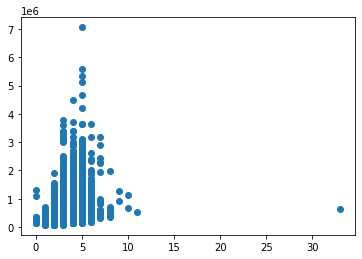

In [4]:
#bedrooms 與 price的關係圖
plt.scatter(df["bedrooms"],df["price"])

#移除異常直
df=df.drop(df[(df["bedrooms"]>30)].index)

In [5]:
#sqft_living15 與 price的關係圖
plt.scatter(df["sqft_living15"],df["price"])

#移除異常直
df=df.drop(df[(df["sqft_living15"]>3000)&(df["price"]>6000000)].index)

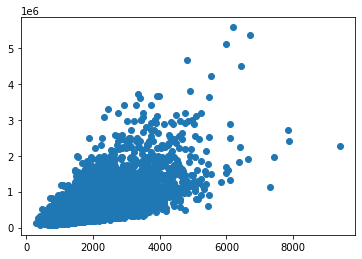

In [6]:
#sqft_above 與 price的關係圖
plt.scatter(df["sqft_above"],df["price"])

#移除異常直
df=df.drop(df[(df["sqft_above"]>8000)&(df["price"]<4000000)].index)

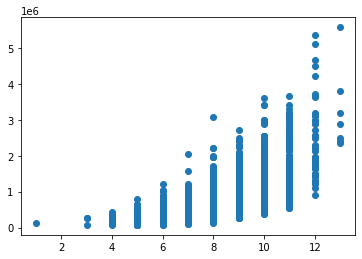

In [7]:
#grade 與 price的關係圖
plt.scatter(df["grade"],df["price"])

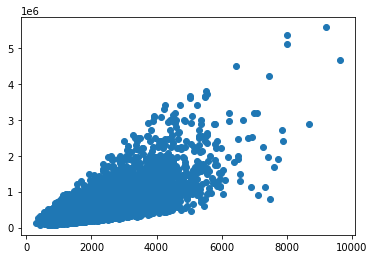

In [8]:
#sqft_living 與 price的關係圖
plt.scatter(df["sqft_living"],df["price"])

#移除異常直
df=df.drop(df[(df["sqft_living"]>12000)&(df["price"]<4000000)].index)

In [9]:
df=df[['bedrooms','sqft_living15','sqft_above','grade','sqft_living','price']]
y_train=df['price']
X_train=df.drop(['price'],axis=1)

In [10]:
df_val = pd.read_csv('valid-v3.csv')
df_val = df_val[['bedrooms','sqft_living15','sqft_above','grade','sqft_living','price']]
y_val = df_val['price']
X_val = df_val.drop(['price'],axis=1)

In [11]:
#对数变换,使其更为正态分布。
y_train=np.log1p(y_train)
y_val = np.log1p(y_val)

In [12]:
#標準化
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [13]:
#建構模型
import keras
from keras import layers
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))
    return model

In [14]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 5)                 11        
_________________________________________________________________
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,620
Trainable params: 4,609
Non-trainable params: 11
_________________________________________________________________


In [15]:
#run the model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=1, epochs=100)

Epoch 1/100
406/406 [==============================] - 1s 1ms/step - loss: 11.4131 - val_loss: 8.5922
Epoch 2/100
406/406 [==============================] - 0s 671us/step - loss: 5.4925 - val_loss: 4.1063
Epoch 3/100
406/406 [==============================] - 0s 671us/step - loss: 3.4990 - val_loss: 2.9877
Epoch 4/100
406/406 [==============================] - 0s 673us/step - loss: 2.4288 - val_loss: 1.9473
Epoch 5/100
406/406 [==============================] - 0s 697us/step - loss: 1.4852 - val_loss: 1.1002
Epoch 6/100
406/406 [==============================] - 0s 686us/step - loss: 0.8080 - val_loss: 0.6357
Epoch 7/100
406/406 [==============================] - 0s 697us/step - loss: 0.5230 - val_loss: 0.4637
Epoch 8/100
406/406 [==============================] - 0s 682us/step - loss: 0.4156 - val_loss: 0.3887
Epoch 9/100
406/406 [==============================] - 0s 786us/step - loss: 0.3703 - val_loss: 0.3610
Epoch 10/100
406/406 [==============================] - 0s 784us/step - lo

Epoch 80/100
406/406 [==============================] - 0s 735us/step - loss: 0.2675 - val_loss: 0.2785
Epoch 81/100
406/406 [==============================] - 0s 702us/step - loss: 0.2670 - val_loss: 0.2763
Epoch 82/100
406/406 [==============================] - 0s 699us/step - loss: 0.2665 - val_loss: 0.2757
Epoch 83/100
406/406 [==============================] - 0s 696us/step - loss: 0.2671 - val_loss: 0.2764
Epoch 84/100
406/406 [==============================] - 0s 732us/step - loss: 0.2674 - val_loss: 0.2772
Epoch 85/100
406/406 [==============================] - 0s 671us/step - loss: 0.2676 - val_loss: 0.2764
Epoch 86/100
406/406 [==============================] - 0s 734us/step - loss: 0.2665 - val_loss: 0.2759
Epoch 87/100
406/406 [==============================] - 0s 685us/step - loss: 0.2672 - val_loss: 0.2770
Epoch 88/100
406/406 [==============================] - 0s 691us/step - loss: 0.2666 - val_loss: 0.2783
Epoch 89/100
406/406 [==============================] - 0s 747us

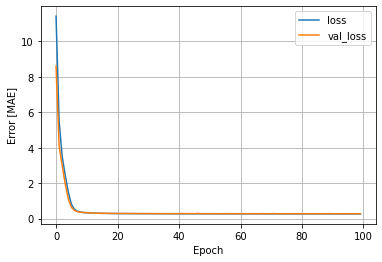

In [16]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MAE]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [17]:
#將預測值轉回去
predict_val=dnn_model.predict(X_val)
predict_val=np.expm1(predict_val)

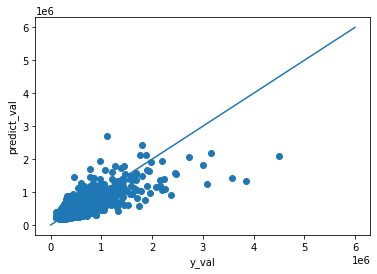

In [18]:
a = np.linspace(0,6000000,6)
plt.scatter(df_val['price'],predict_val)
plt.plot(a,a)

plt.xlabel('y_val')
plt.ylabel('predict_val')
plt.show()

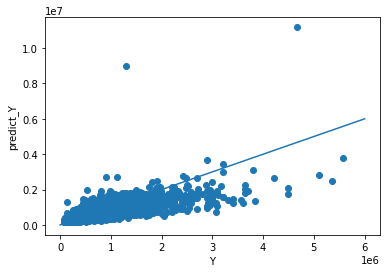

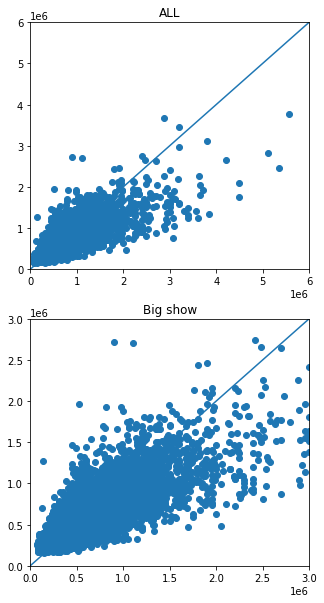

In [20]:
X=pd.concat([X_train,X_val])
Y=pd.concat([df['price'],df_val['price']])
predict_Y=dnn_model.predict(X)
predict_Y=np.expm1(predict_Y)

a = np.linspace(0,6000000,6)
plt.scatter(Y,predict_Y)
plt.plot(a,a)

plt.xlabel('Y')
plt.ylabel('predict_Y')
plt.show()

fig, axs = plt.subplots(2,figsize=(5,10))
axs[0].scatter(Y,predict_Y)
axs[0].plot(a,a)
axs[0].axis(xmin=0,xmax=6000000,ymin=0,ymax=6000000)
axs[0].title.set_text("ALL")
axs[1].scatter(Y,predict_Y)
axs[1].plot(a,a)
axs[1].axis(xmin=0,xmax=3000000,ymin=0,ymax=3000000)
axs[1].title.set_text("Big show")
plt.show()